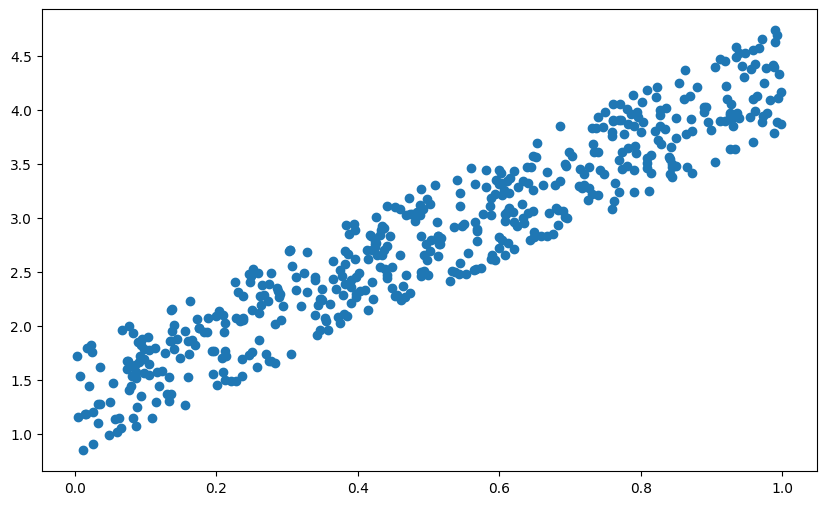

In [1]:
#手写线性回归

import torch
x = torch.rand([500,1])
noise = torch.rand(size=(500,1))
y_true = x*3+0.8+noise

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
plt.scatter(x,y_true)

In [2]:
w = torch.tensor([[0]],dtype=torch.float32,requires_grad=True)
b = torch.tensor(0,dtype=torch.float32,requires_grad=True)
print(w,b)
num_epochs = 1000
lr = 0.05
hist = []
for epoch in range(num_epochs):
    y_pred = torch.mm(x,w)+b
    loss = (y_pred-y_true).pow(2).mean()
    if w.grad is not None:
        w.grad.data.zero_()
    if b.grad is not None:
        b.grad.data.zero_()
    loss.backward()
    hist.append(loss.detach())
    w.data = w.data-lr*w.grad
    b.data = b.data-lr*b.grad
    print(f'epoch: {epoch} loss: {loss}')
print(w.detach())
print(b.detach())

tensor([[0.]], requires_grad=True) tensor(0., requires_grad=True)
epoch: 0 loss: 8.717583656311035
epoch: 1 loss: 6.714031219482422
epoch: 2 loss: 5.187695503234863
epoch: 3 loss: 4.024751663208008
epoch: 4 loss: 3.1385250091552734
epoch: 5 loss: 2.4630162715911865
epoch: 6 loss: 1.947969675064087
epoch: 7 loss: 1.5551170110702515
epoch: 8 loss: 1.2553184032440186
epoch: 9 loss: 1.026384711265564
epoch: 10 loss: 0.8514204025268555
epoch: 11 loss: 0.7175592184066772
epoch: 12 loss: 0.6150043606758118
epoch: 13 loss: 0.5362958908081055
epoch: 14 loss: 0.4757533073425293
epoch: 15 loss: 0.42905059456825256
epoch: 16 loss: 0.39289405941963196
epoch: 17 loss: 0.36477532982826233
epoch: 18 loss: 0.34278440475463867
epoch: 19 loss: 0.32546666264533997
epoch: 20 loss: 0.3117145299911499
epoch: 21 loss: 0.30068445205688477
epoch: 22 loss: 0.2917340397834778
epoch: 23 loss: 0.28437405824661255
epoch: 24 loss: 0.27823182940483093
epoch: 25 loss: 0.27302369475364685
epoch: 26 loss: 0.2685332298278

[[2.9887152]]


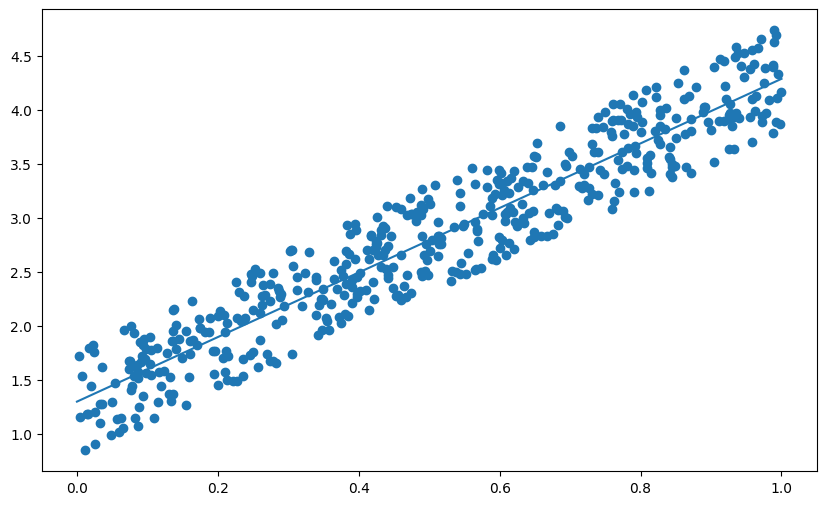

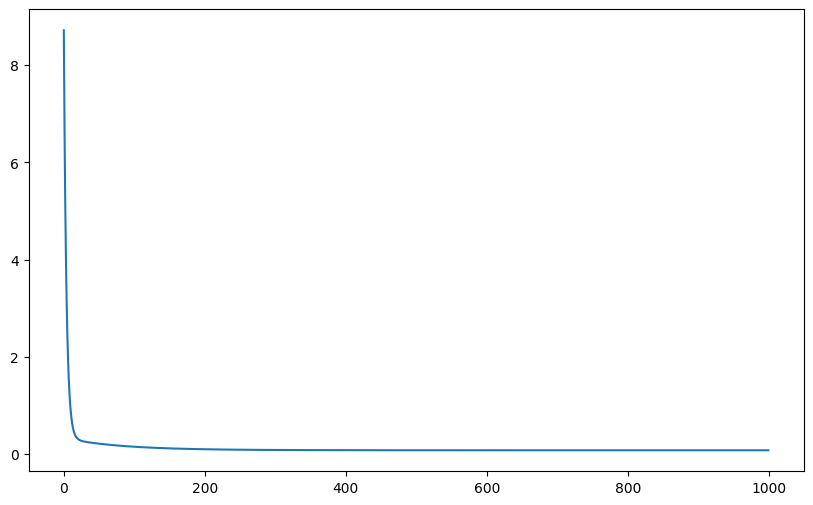

In [3]:
w = w.detach().numpy()
b = b.detach().numpy()
print(w)
w = w[0]
fig = plt.figure(figsize=(10,6))
y1 = w*0+b
y2 = w*1+b
plt.plot([0,1],[y1,y2])
plt.scatter(x,y_true)

fig = plt.figure(figsize=(10,6))
plt.plot(hist)

In [4]:
# nn.Module简化实现线性回归
import torch.nn as nn

epoch: 0 loss: 8.285246849060059
epoch: 1 loss: 6.469658374786377
epoch: 2 loss: 5.0853986740112305
epoch: 3 loss: 4.029601573944092
epoch: 4 loss: 3.2239370346069336
epoch: 5 loss: 2.608760356903076
epoch: 6 loss: 2.138653039932251
epoch: 7 loss: 1.7790312767028809
epoch: 8 loss: 1.503561019897461
epoch: 9 loss: 1.2921884059906006
epoch: 10 loss: 1.1296442747116089
epoch: 11 loss: 1.0043003559112549
epoch: 12 loss: 0.9073028564453125
epoch: 13 loss: 0.8319090008735657
epoch: 14 loss: 0.772984504699707
epoch: 15 loss: 0.7266196012496948
epoch: 16 loss: 0.6898370385169983
epoch: 17 loss: 0.660369336605072
epoch: 18 loss: 0.6364896297454834
epoch: 19 loss: 0.6168827414512634
epoch: 20 loss: 0.6005472540855408
epoch: 21 loss: 0.5867201685905457
epoch: 22 loss: 0.5748203992843628
epoch: 23 loss: 0.5644051432609558
epoch: 24 loss: 0.5551370978355408
epoch: 25 loss: 0.5467591285705566
epoch: 26 loss: 0.5390754342079163
epoch: 27 loss: 0.5319364070892334
epoch: 28 loss: 0.5252282619476318
epo

c:\Users\26250\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\shape_base.py:65: FutureWarning: The input object of type 'Tensor' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Tensor', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  ary = asanyarray(ary)
c:\Users\26250\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


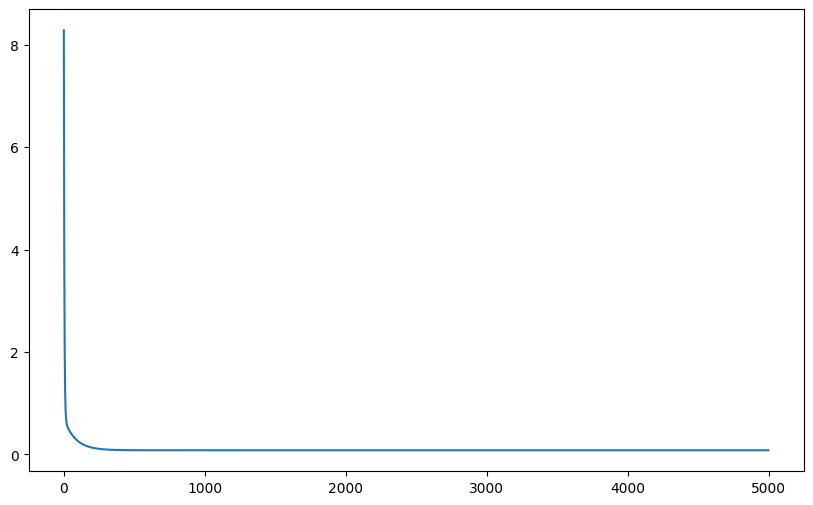

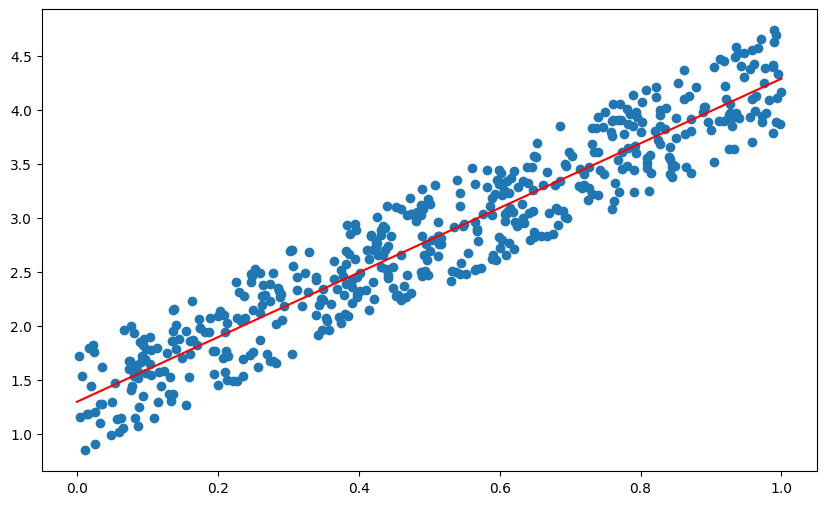

In [5]:

class LR(nn.Module):
    def __init__(self):
        super(LR,self).__init__()
        self.linear = nn.Linear(1,1)
    
    def forward(self,x):
        out = self.linear(x)
        return out
    
module = LR()
loss = nn.MSELoss()
optimiser = torch.optim.SGD(module.parameters(),lr = 0.05)

num_epochs = 5000
hist = []
for epoch in range(num_epochs):
    y_pred = module(x)
    l=loss(y_true,y_pred)
    optimiser.zero_grad()
    l.backward()
    optimiser.step()
    hist.append(l.detach())
    print(f"epoch: {epoch} loss: {l}")
    
fig = plt.figure(figsize=(10,6))
plt.plot(hist)

fig = plt.figure(figsize=(10,6))
y1 = module(torch.tensor([[0]],dtype=torch.float32))
y2 = module(torch.tensor([[1]],dtype=torch.float32))
plt.plot([0,1],[y1.detach(),y2.detach()],'r-')
plt.scatter(x,y_true)